In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./heart.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


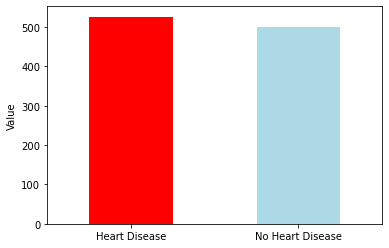

In [4]:
# target distribution 
fig = dataset['target'].value_counts().plot(kind = 'bar', color = ['red', 'lightblue'])
fig.set_xticklabels(labels = ['Heart Disease', 'No Heart Disease'], rotation=0)
plt.ylabel('Value')
plt.show()

In [5]:
count = dataset['target'].value_counts()
print ('Number of people having heart disease is', count[1])
print ('Number of people not having heart disease is', count[0])
print ('Rate of people having heart disease is', count[1]/1025*100)
print ('Rate of people not having heart disease is', count[0]/1025*100)

Number of people having heart disease is 526
Number of people not having heart disease is 499
Rate of people having heart disease is 51.31707317073171
Rate of people not having heart disease is 48.68292682926829


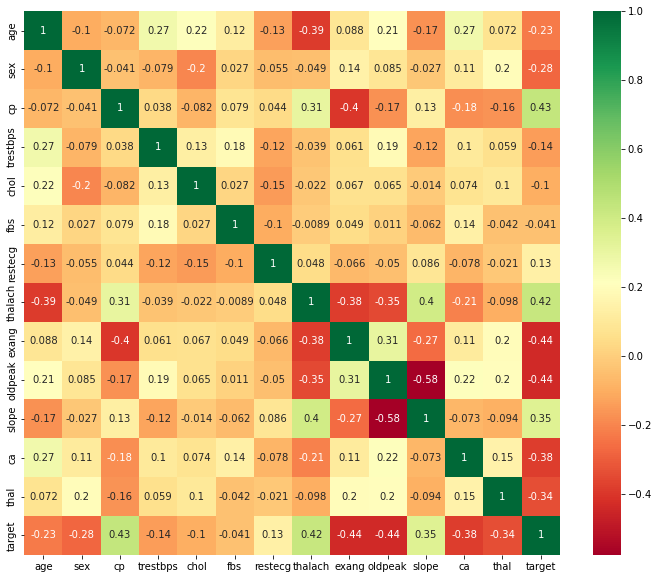

In [6]:
# heatmap for features
import seaborn as sns
fig_dim = (12, 10)
fig, ax = plt.subplots(figsize=fig_dim)
sns.heatmap(dataset.corr(), ax=ax, annot=True, cmap = 'RdYlGn')
plt.show()

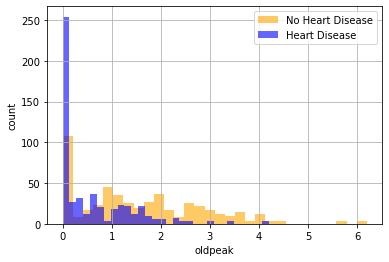

In [7]:
# relationship between heart disease and oldpeak
dataset[dataset['target'] == 0]['oldpeak'].hist(bins = 30, color = 'orange', label = 'No Heart Disease', alpha = 0.6)
dataset[dataset['target'] == 1]['oldpeak'].hist(bins = 30, color = 'blue', label = 'Heart Disease', alpha = 0.6)
plt.legend()
plt.xlabel('oldpeak')
plt.ylabel('count')
plt.show()
plt.title('category data bar char for {}'.format(feature))

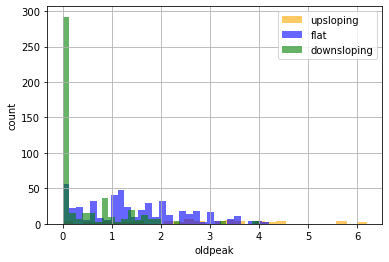

In [8]:
#relationship between oldpeak and slope
dataset[dataset['slope'] == 0]['oldpeak'].hist(bins = 30, color = 'orange', label = 'upsloping', alpha = 0.6)
dataset[dataset['slope'] == 1]['oldpeak'].hist(bins = 30, color = 'blue', label = 'flat', alpha = 0.6)
dataset[dataset['slope'] == 2]['oldpeak'].hist(bins = 30, color = 'green', label = 'downsloping', alpha = 0.6)
plt.legend()
plt.xlabel('oldpeak')
plt.ylabel('count')
plt.show()

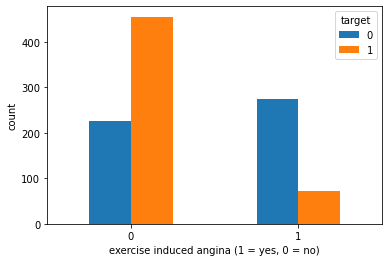

In [9]:
# relationship between exang and heart disease
pd.crosstab(dataset.exang, dataset.target).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.xlabel('exercise induced angina (1 = yes, 0 = no)')
plt.show()

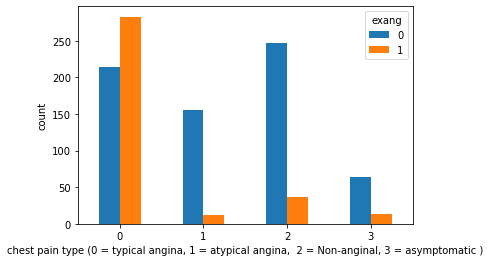

In [10]:
# relationship between exang and cp
pd.crosstab(dataset.cp, dataset.exang).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.xlabel('chest pain type (0 = typical angina, 1 = atypical angina,  2 = Non-anginal, 3 = asymptomatic )')
plt.show()

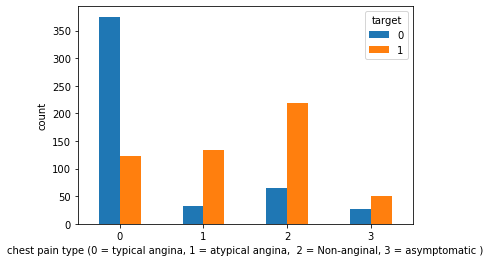

In [11]:
# relationship between cp and heart disease
pd.crosstab(dataset.cp, dataset.target).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.xlabel('chest pain type (0 = typical angina, 1 = atypical angina,  2 = Non-anginal, 3 = asymptomatic )')
plt.show()

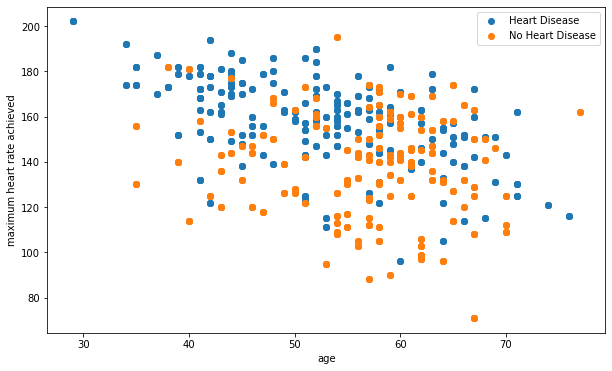

In [12]:
# Relationship between thalach and age and heart disease
fig,ax = plt.subplots(figsize=(10, 6))
ax.scatter(dataset.age[dataset.target == 1], dataset.thalach[dataset.target == 1], label = 'Heart Disease')
ax.scatter(dataset.age[dataset.target == 0], dataset.thalach[dataset.target == 0], label = 'No Heart Disease')
plt.xlabel('age')
plt.ylabel('maximum heart rate achieved')
plt.legend()
plt.show()

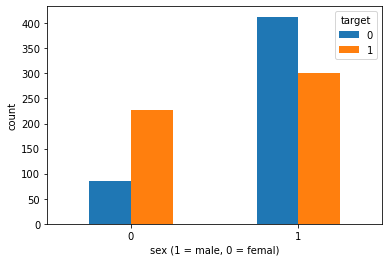

In [13]:
# relationship between sex and heart disease
pd.crosstab(dataset.sex, dataset.target).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.xlabel('sex (1 = male, 0 = femal)')
plt.show()

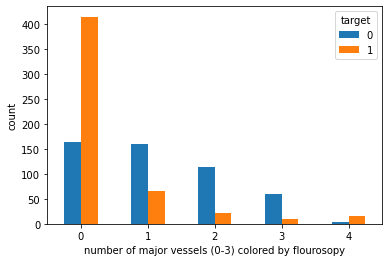

In [14]:
# relationship between ca and heart disease
pd.crosstab(dataset.ca, dataset.target).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.xlabel('number of major vessels (0-3) colored by flourosopy')
plt.show()

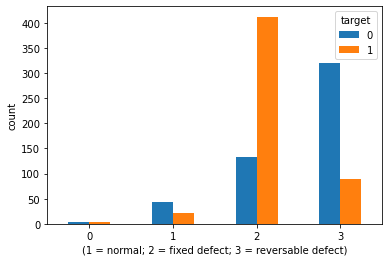

In [15]:
pd.crosstab(dataset.thal, dataset.target).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.xlabel('(1 = normal; 2 = fixed defect; 3 = reversable defect)')
plt.show()

In [16]:
category_value = []
continue_value = []

for col in dataset.columns:
    if len(dataset[col].unique()) >= 10:
        continue_value.append(col)
    else:
        category_value.append(col)
        
print("the category value set is ", category_value)
print("the continue value set is ", continue_value)

the category value set is  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
the continue value set is  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


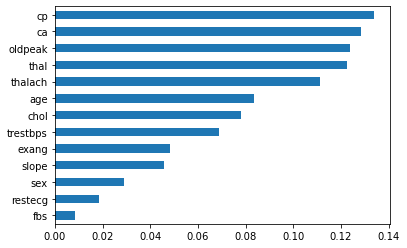

the accuracy of RandomForestClassifier is 0.9853658536585366


In [253]:
# Feature selection
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dataset.drop('target', axis = 1)
y = dataset.target
rfc = RandomForestClassifier(n_estimators = 250, random_state = 0)
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfc.fit(X_train_rfc, y_train_rfc)
importances = rfc.feature_importances_
feature_scores = pd.Series(importances, index = X_train_rfc.columns).sort_values()
feature_scores.plot(kind = 'barh')
plt.show()
accuracy = accuracy_score(y_test_rfc, rfc.predict(X_test_rfc))
print("the accuracy of RandomForestClassifier is", accuracy)

In [291]:
features = ['thalach', 'oldpeak', 'thal', 'ca', 'cp']
data = dataset[features]
data.head()

,thalach,oldpeak,thal,ca,cp
0,168,1.0,3,2,0
1,155,3.1,3,0,0
2,125,2.6,3,0,0
3,161,0.0,3,1,0
4,106,1.9,2,3,0


Silhouette score for 2 clusters is 0.5711037972775018
Silhouette score for 3 clusters is 0.5265768025382648
Silhouette score for 4 clusters is 0.5065424979867555
Silhouette score for 5 clusters is 0.5068442387954293
Silhouette score for 6 clusters is 0.5010850625667573
Silhouette score for 7 clusters is 0.5051036984808971
Silhouette score for 8 clusters is 0.5002607114644257
Silhouette score for 9 clusters is 0.5051209165101342
Silhouette score for 10 clusters is 0.48800414817800075
Silhouette score for 11 clusters is 0.48223035314968843


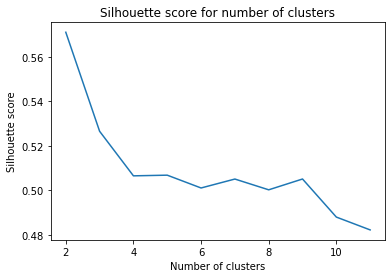

In [307]:
# use kmeans with different k to calculate the silhouette and decide which k provides the highest silhoutte
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = range(2, 12)
silhouette_avg = []
for cluster in clusters:
    
    kmeans = KMeans(n_clusters = cluster, max_iter = 300, init = "k-means++", random_state = 42)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    
    score = silhouette_score(data, cluster_labels, metric = "euclidean") 
    silhouette_avg.append(score)
    print('Silhouette score for {} clusters is {}'. format(cluster, score))
    
plt.plot(clusters, silhouette_avg, )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for number of clusters')
plt.show()

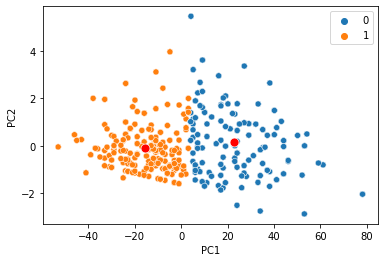

In [300]:
# use PCA to visualize the cluster in a 2D dimension
from sklearn.decomposition import PCA

# sc = StandardScaler()
# data[['thalach', 'oldpeak']] = sc.fit_transform(data[['thalach', 'oldpeak']])
pca = PCA(2)
# tranform the data and add to pca
pca_data = pd.DataFrame(pca.fit_transform(data),columns=['PC1','PC2']) 
kmean2 = KMeans(n_clusters = 2, max_iter = 300, init = "k-means++", random_state = 0).fit(pca_data)
center = kmean2.cluster_centers_
pca_data['cluster'] = pd.Categorical(kmean2.labels_)
ax = sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
sns.scatterplot(x = center[:,0], y = center[:,1], marker="o", color='r', s=80, ax = ax)
plt.show()

In [301]:
# rand index for labels
from sklearn.metrics import rand_score
label_pred = kmean.predict(data)
label = dataset.target
rand_score = rand_score(label, label_pred)
print('the rand score is', rand_score)

the rand score is 0.5768788109756098


In [308]:
# use naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = dataset.drop('target', axis = 1)

y = dataset.target
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report_for_bayes = classification_report(y_test, y_pred)
confusion_for_bayes = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("the accuracy of Naive Bayes model is", accuracy)
print(report_for_bayes)
print(confusion_for_bayes)

the accuracy of Naive Bayes model is 0.814935064935065
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308

[[118  41]
 [ 16 133]]


In [309]:
# use decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_predict)
print("the accuracy of Decision tree model is", accuracy_tree)
report_for_tree = classification_report(y_test, y_predict)
confusion_for_tree = confusion_matrix(y_test, y_predict)
print(report_for_tree)
print(confusion_for_tree)

the accuracy of Decision tree model is 0.8051948051948052
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       159
           1       0.75      0.89      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.82      0.81      0.80       308

[[116  43]
 [ 17 132]]


In [196]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.1 MB/s eta 0:00:01


In [207]:
from mlxtend.evaluate import mcnemar_tables

# create contigency table for McNemar's test
tb = mcnemar_tables(y_test, y_pred, y_predict)
table = tb['model_0 vs model_1']
table

array([[225.,  26.],
       [ 23.,  34.]])

In [208]:
from statsmodels.stats.contingency_tables import mcnemar

# calculate mcnemar test
test = mcnemar(table, exact = True)
# summarize the finding
print('statistic = %.3f, p-value = %.3f' % (test.statistic, test.pvalue))
# interpret the p-value
alpha = 0.5
if test.pvalue > alpha:
    print('same proportions of errors (fail to reject H0)')
else:
    print('different proportions of errors (reject H0)')

statistic = 23.000, p-value = 0.775
same proportions of errors (fail to reject H0)


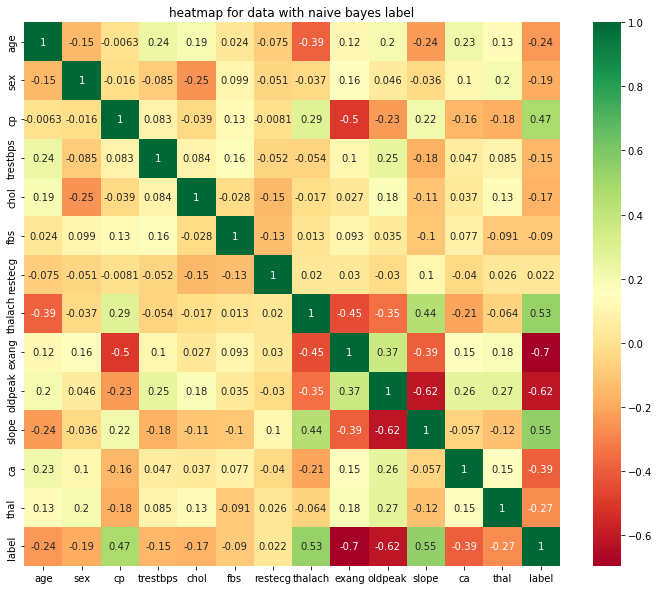

In [325]:
# feature correlation with label of naive bayes
natestdata = X_test.copy()
natestdata['label'] = y_pred
natestdata
fig_dim = (12, 10)
fig, ax = plt.subplots(figsize=fig_dim)
sns.heatmap(natestdata.corr(), ax=ax, annot=True, cmap = 'RdYlGn')
plt.title('heatmap for data with naive bayes label')
plt.show()

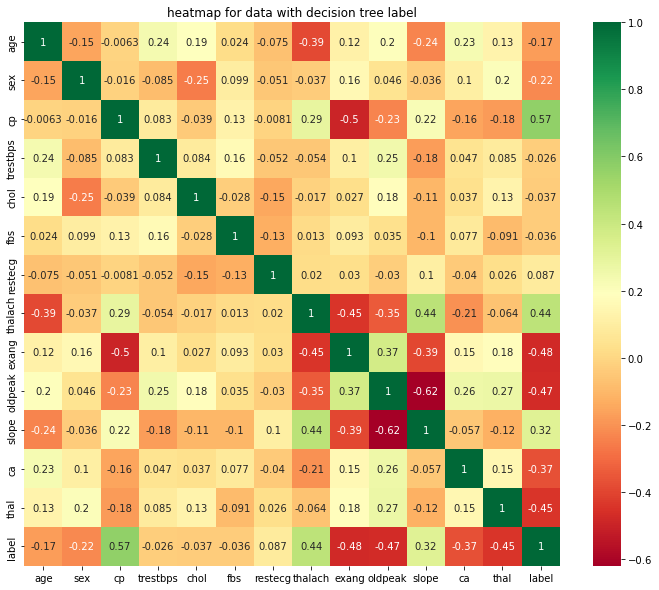

In [327]:
# feature correlation with label of decision tree
natestdata = X_test.copy()
natestdata['label'] = y_predict
natestdata
fig_dim = (12, 10)
fig, ax = plt.subplots(figsize=fig_dim)
sns.heatmap(natestdata.corr(), ax=ax, annot=True, cmap = 'RdYlGn')
plt.title('heatmap for data with decision tree label')
plt.show()

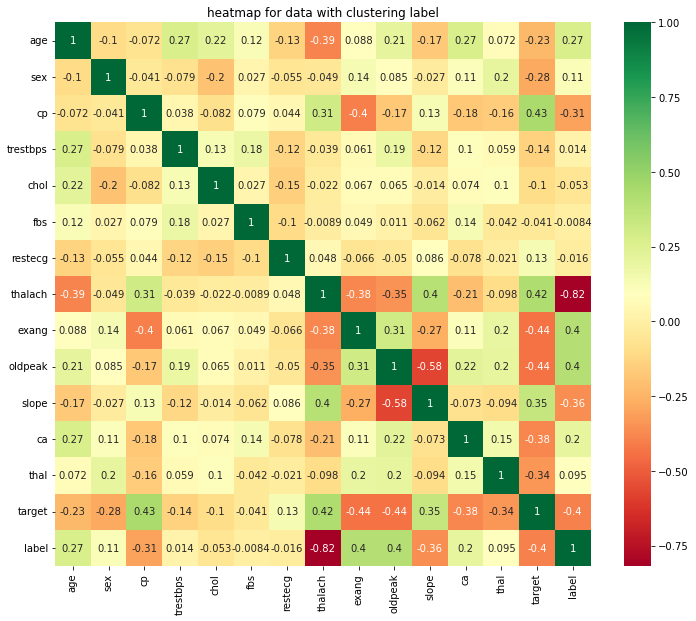

In [326]:
# feature correlation with label of kmeans clustering
datanew = dataset.copy()
datanew['label'] = label_pred
fig_dim = (12, 10)
fig, ax = plt.subplots(figsize=fig_dim)
sns.heatmap(datanew.corr(), ax=ax, annot=True, cmap = 'RdYlGn')
plt.title('heatmap for data with clustering label')
plt.show()